# import necessary libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import operator
import math
import random

import numpy as np
from scipy.linalg import norm
from scipy.spatial.distance import cdist
from collections import defaultdict


from sklearn import datasets
from sklearn.datasets import make_blobs

# ignoring warnings
import warnings
warnings.simplefilter("ignore")

import os, cv2, json


np.random.seed(42)

In [ ]:
!pip install opendatasets
import opendatasets as od
od.download('https://www.kaggle.com/datasets/deepcontractor/smoke-detection-dataset')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Skipping, found downloaded files in "./smoke-detection-dataset" (use force=True to force download)


# import dataset

In [ ]:
df=pd.read_csv('/content/smoke-detection-dataset/smoke_detection_iot.csv')
df

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,62625,1655130047,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739,0
62626,62626,1655130048,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740,0
62627,62627,1655130049,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741,0
62628,62628,1655130050,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742,0


In [ ]:
df=df.drop('Unnamed: 0',axis=1)


In [ ]:
df.isnull().sum()

UTC               0
Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
CNT               0
Fire Alarm        0
dtype: int64

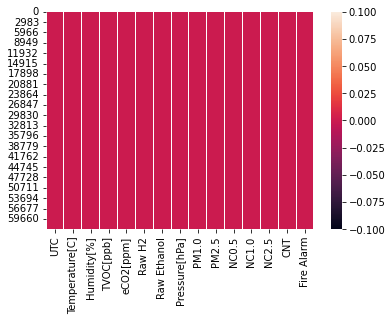

In [ ]:
sns.heatmap(df.isna())


In [ ]:
df.duplicated().sum()

0

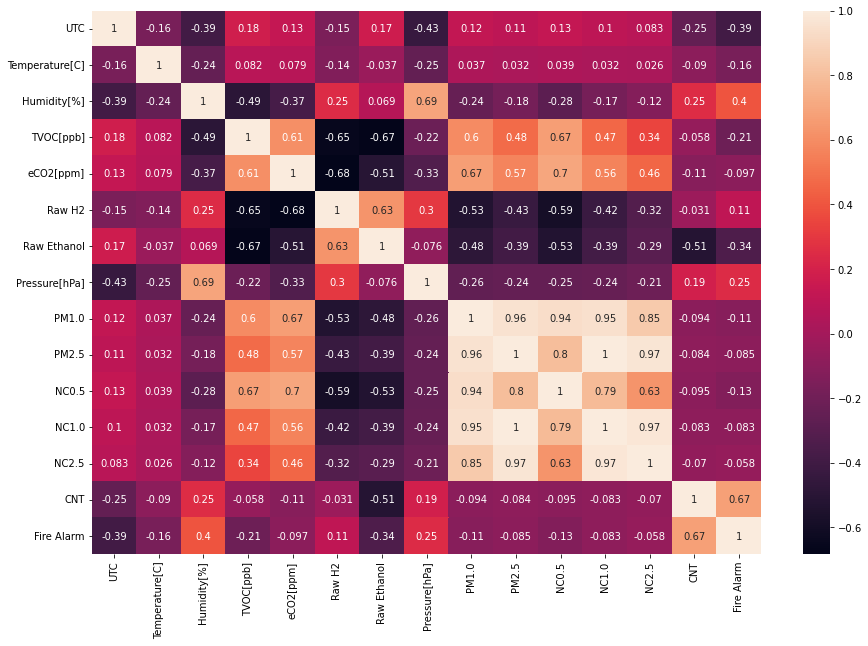

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [ ]:
df.drop(['eCO2[ppm]','PM2.5','NC1.0','NC2.5'],axis=1,inplace=True)

In [ ]:
df

,UTC,Temperature[C],Humidity[%],TVOC[ppb],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,NC0.5,CNT,Fire Alarm
0,1654733331,20.000,57.36,0,12306,18520,939.735,0.00,0.00,0,0
1,1654733332,20.015,56.67,0,12345,18651,939.744,0.00,0.00,1,0
2,1654733333,20.029,55.96,0,12374,18764,939.738,0.00,0.00,2,0
3,1654733334,20.044,55.28,0,12390,18849,939.736,0.00,0.00,3,0
4,1654733335,20.059,54.69,0,12403,18921,939.744,0.00,0.00,4,0
...,...,...,...,...,...,...,...,...,...,...,...
62625,1655130047,18.438,15.79,625,13723,20569,936.670,0.63,4.32,5739,0
62626,1655130048,18.653,15.87,612,13731,20588,936.678,0.61,4.18,5740,0
62627,1655130049,18.867,15.84,627,13725,20582,936.687,0.57,3.95,5741,0
62628,1655130050,19.083,16.04,638,13712,20566,936.680,0.57,3.92,5742,0


In [ ]:
df.describe()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,NC0.5,CNT,Fire Alarm
count,6.263000e+04,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000
mean,1.654792e+09,15.970424,48.539499,1942.057528,12942.453936,19754.257912,938.627649,100.594309,491.463608,10511.386157,0.714626
std,1.100025e+05,14.359576,8.865367,7811.589055,272.464305,609.513156,1.331344,922.524245,4265.661251,7597.870997,0.451596
min,1.654712e+09,-22.010000,10.740000,0.000000,10668.000000,15317.000000,930.852000,0.000000,0.000000,0.000000,0.000000
25%,1.654743e+09,10.994250,47.530000,130.000000,12830.000000,19435.000000,938.700000,1.280000,8.820000,3625.250000,0.000000
50%,1.654762e+09,20.130000,50.150000,981.000000,12924.000000,19501.000000,938.816000,1.810000,12.450000,9336.000000,1.000000
75%,1.654778e+09,25.409500,53.240000,1189.000000,13109.000000,20078.000000,939.418000,2.090000,14.420000,17164.750000,1.000000
max,1.655130e+09,59.930000,75.200000,60000.000000,13803.000000,21410.000000,939.861000,14333.690000,61482.030000,24993.000000,1.000000


# find the outliers

In [ ]:
def find_outliers_IQR(df):

    q1=df.quantile(0.25)

    q3=df.quantile(0.75)

    IQR=q3-q1

    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

    return outliers

In [ ]:
for i in df.columns:
    outliers = find_outliers_IQR(df[i])
    print(f'outliers of coulmn {i}')
    print()
    print("number of outliers:" + str(len(outliers)))
    print("max outlier value: "+ str(outliers.max()))
    print("min outlier value: " + str(outliers.min()))
    print('')
    print('-------------------------------------------')

outliers of coulmn UTC

number of outliers:6898
max outlier value: 1655130051
min outlier value: 1654903005

-------------------------------------------
outliers of coulmn Temperature[C]

number of outliers:3908
max outlier value: 59.93
min outlier value: -22.01

-------------------------------------------
outliers of coulmn Humidity[%]

number of outliers:5083
max outlier value: 75.2
min outlier value: 10.74

-------------------------------------------
outliers of coulmn TVOC[ppb]

number of outliers:2463
max outlier value: 60000
min outlier value: 2779

-------------------------------------------
outliers of coulmn Raw H2

number of outliers:1953
max outlier value: 13803
min outlier value: 10668

-------------------------------------------
outliers of coulmn Raw Ethanol

number of outliers:1951
max outlier value: 21410
min outlier value: 15317

-------------------------------------------
outliers of coulmn Pressure[hPa]

number of outliers:12632
max outlier value: 937.622
min outlier

In [ ]:
def find_outliers_Index(df,col):

    q1=df[col].quantile(0.25)

    q3=df[col].quantile(0.75)

    IQR=q3-q1

    outliers = df.index[((df[col]<(q1-1.5*IQR)) | (df[col]>(q3+1.5*IQR)))]

    return outliers

In [ ]:
index_=[]
for col in df.columns:
    index_.extend(find_outliers_Index(df,col))
index_

[49988,
 49989,
 49990,
 49991,
 49992,
 49993,
 49994,
 49995,
 49996,
 49997,
 49998,
 49999,
 50000,
 50001,
 50002,
 50003,
 50004,
 50005,
 50006,
 50007,
 50008,
 50009,
 50010,
 50011,
 50012,
 50013,
 50014,
 50015,
 50016,
 50017,
 50018,
 50019,
 50020,
 50021,
 50022,
 50023,
 50024,
 50025,
 50026,
 50027,
 50028,
 50029,
 50030,
 50031,
 50032,
 50033,
 50034,
 50035,
 50036,
 50037,
 50038,
 50039,
 50040,
 50041,
 50042,
 50043,
 50044,
 50045,
 50046,
 50047,
 50048,
 50049,
 50050,
 50051,
 50052,
 50053,
 50054,
 50055,
 50056,
 50057,
 50058,
 50059,
 50060,
 50061,
 50062,
 50063,
 50064,
 50065,
 50066,
 50067,
 50068,
 50069,
 50070,
 50071,
 50072,
 50073,
 50074,
 50075,
 50076,
 50077,
 50078,
 50079,
 50080,
 50081,
 50082,
 50083,
 50084,
 50085,
 50086,
 50087,
 50088,
 50089,
 50090,
 50091,
 50092,
 50093,
 50094,
 50095,
 50096,
 50097,
 50098,
 50099,
 50100,
 50101,
 50102,
 50103,
 50104,
 50105,
 50106,
 50107,
 50108,
 50109,
 50110,
 50111,
 50112,


In [ ]:
def remove_outliers(df,lst):
    lst=sorted(set(lst))
    df=df.drop(lst)
    return df

In [ ]:
df_witout_outliers=remove_outliers(df,index_)
df_witout_outliers

,UTC,Temperature[C],Humidity[%],TVOC[ppb],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,NC0.5,CNT,Fire Alarm
151,1654733482,22.032,52.13,28,12543,19638,939.820,0.21,0.58,151,0
152,1654733483,22.044,52.62,23,12558,19649,939.815,0.15,0.44,152,0
192,1654733523,22.520,49.89,3,12600,19679,939.810,0.82,2.51,192,0
193,1654733524,22.531,49.78,12,12596,19677,939.807,0.81,2.49,193,0
194,1654733525,22.543,49.71,1,12597,19676,939.813,0.77,2.38,194,0
...,...,...,...,...,...,...,...,...,...,...,...
51223,1654712268,26.840,44.99,17,12863,20774,937.630,2.18,15.00,81,0
51224,1654712269,26.810,45.00,27,12853,20763,937.634,2.18,15.00,82,0
51225,1654712270,28.250,45.00,7,12870,20795,937.624,2.17,14.95,83,0
51227,1654712272,28.910,42.89,31,12871,20756,937.625,2.15,14.81,85,0


In [ ]:
df_witout_outliers=df_witout_outliers.reset_index()
df_witout_outliers

,index,UTC,Temperature[C],Humidity[%],TVOC[ppb],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,NC0.5,CNT,Fire Alarm
0,151,1654733482,22.032,52.13,28,12543,19638,939.820,0.21,0.58,151,0
1,152,1654733483,22.044,52.62,23,12558,19649,939.815,0.15,0.44,152,0
2,192,1654733523,22.520,49.89,3,12600,19679,939.810,0.82,2.51,192,0
3,193,1654733524,22.531,49.78,12,12596,19677,939.807,0.81,2.49,193,0
4,194,1654733525,22.543,49.71,1,12597,19676,939.813,0.77,2.38,194,0
...,...,...,...,...,...,...,...,...,...,...,...,...
46595,51223,1654712268,26.840,44.99,17,12863,20774,937.630,2.18,15.00,81,0
46596,51224,1654712269,26.810,45.00,27,12853,20763,937.634,2.18,15.00,82,0
46597,51225,1654712270,28.250,45.00,7,12870,20795,937.624,2.17,14.95,83,0
46598,51227,1654712272,28.910,42.89,31,12871,20756,937.625,2.15,14.81,85,0


In [ ]:
df_witout_outliers=df_witout_outliers.drop('index',axis=1)

In [ ]:
df_witout_outliers

,UTC,Temperature[C],Humidity[%],TVOC[ppb],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,NC0.5,CNT,Fire Alarm
0,1654733482,22.032,52.13,28,12543,19638,939.820,0.21,0.58,151,0
1,1654733483,22.044,52.62,23,12558,19649,939.815,0.15,0.44,152,0
2,1654733523,22.520,49.89,3,12600,19679,939.810,0.82,2.51,192,0
3,1654733524,22.531,49.78,12,12596,19677,939.807,0.81,2.49,193,0
4,1654733525,22.543,49.71,1,12597,19676,939.813,0.77,2.38,194,0
...,...,...,...,...,...,...,...,...,...,...,...
46595,1654712268,26.840,44.99,17,12863,20774,937.630,2.18,15.00,81,0
46596,1654712269,26.810,45.00,27,12853,20763,937.634,2.18,15.00,82,0
46597,1654712270,28.250,45.00,7,12870,20795,937.624,2.17,14.95,83,0
46598,1654712272,28.910,42.89,31,12871,20756,937.625,2.15,14.81,85,0


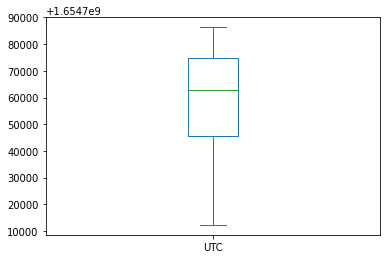

In [ ]:
df_witout_outliers['UTC'].plot.box()

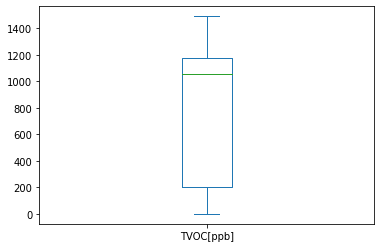

In [ ]:
df_witout_outliers['TVOC[ppb]'].plot.box()

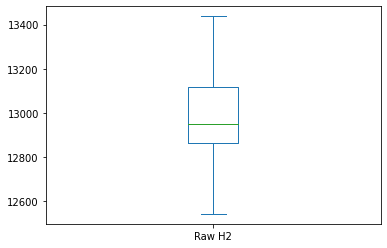

In [ ]:
df_witout_outliers['Raw H2'].plot.box()

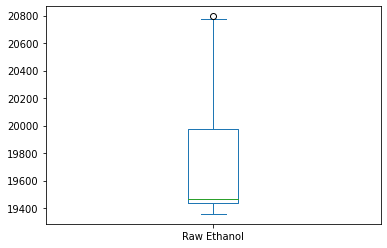

In [ ]:
df_witout_outliers['Raw Ethanol'].plot.box()

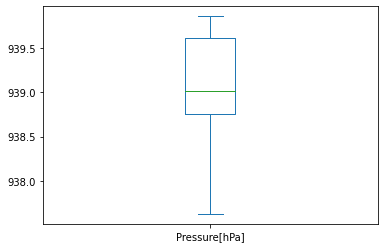

In [ ]:
df_witout_outliers['Pressure[hPa]'].plot.box()

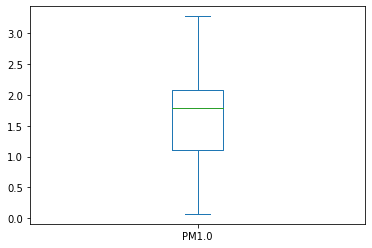

In [ ]:
df_witout_outliers['PM1.0'].plot.box()

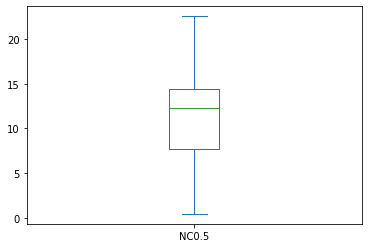

In [ ]:
df_witout_outliers['NC0.5'].plot.box()

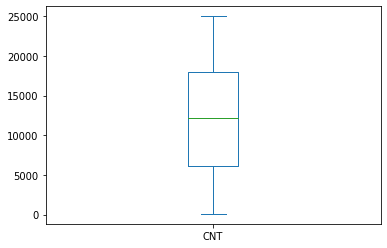

In [ ]:
df_witout_outliers['CNT'].plot.box()

In [ ]:
df_witout_outliers.describe()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,NC0.5,CNT,Fire Alarm
count,4.660000e+04,46600.000000,46600.000000,46600.000000,46600.000000,46600.000000,46600.000000,46600.000000,46600.000000,46600.000000,46600.000000
mean,1.654760e+09,16.293227,51.392333,765.147575,12980.725193,19666.676567,939.133184,1.600103,11.010269,12170.198369,0.874957
std,1.609742e+04,10.975319,3.016832,506.182614,149.228896,295.356562,0.396624,0.693543,4.778192,6934.276338,0.330771
min,1.654712e+09,-10.624000,41.350000,0.000000,12543.000000,19357.000000,937.624000,0.070000,0.430000,81.000000,0.000000
25%,1.654746e+09,12.401750,48.620000,203.000000,12866.000000,19436.000000,938.756000,1.110000,7.660000,6176.000000,1.000000
50%,1.654763e+09,20.080000,51.490000,1053.000000,12948.000000,19467.000000,939.017000,1.790000,12.340000,12180.000000,1.000000
75%,1.654775e+09,24.720000,53.480000,1176.000000,13118.000000,19977.000000,939.611000,2.090000,14.390000,18005.000000,1.000000
max,1.654786e+09,29.160000,61.800000,1490.000000,13438.000000,20795.000000,939.861000,3.280000,22.560000,24993.000000,1.000000


# check data if balanced or not

In [ ]:
df_witout_outliers['Fire Alarm'].value_counts()

1    40773
0     5827
Name: Fire Alarm, dtype: int64

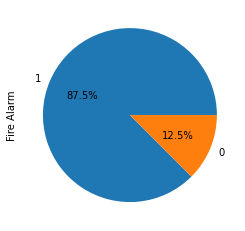

In [ ]:
df_witout_outliers['Fire Alarm'].value_counts().plot.pie(autopct="%1.1f%%")

split data to X and y

In [ ]:
X=df_witout_outliers.drop('Fire Alarm',axis=1)
y=df_witout_outliers['Fire Alarm']

# try to make the data balanced using over sampling

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [ ]:
y.value_counts()

0    40773
1    40773
Name: Fire Alarm, dtype: int64

# dealing with different scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
names = X.columns
scaler=MinMaxScaler()
d = scaler.fit_transform(X)
scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,NC0.5,CNT
0,0.286412,0.820832,0.527139,0.018792,0.000000,0.195410,0.981672,0.043614,0.006778,0.002810
1,0.286426,0.821134,0.551100,0.015436,0.016760,0.203060,0.979437,0.024922,0.000452,0.002850
2,0.286966,0.833099,0.417604,0.002013,0.063687,0.223922,0.977202,0.233645,0.093990,0.004456
3,0.286980,0.833375,0.412225,0.008054,0.059218,0.222531,0.975861,0.230530,0.093086,0.004496
4,0.286993,0.833677,0.408802,0.000671,0.060335,0.221836,0.978543,0.218069,0.088116,0.004536


In [ ]:
data = scaled_df.values

In [ ]:
def euclidean_distance(point1,point2):
    dis=0
    for i in range(len(point1)):
        dis+=(point1[i]-point2[i])**2
    return dis**0.5

In [ ]:
m=2
n=len(data)
c=2
p=len(data[0])
max_iter=100

In [ ]:
n

81546

In [ ]:
def initialize_membership_matrix(n,c):
    member_mat=list()
    for i in range(n):
        random_list=[random.random() for x in range(c)]
        summation=sum(random_list)
        for i in range(len(random_list)):
            random_list[i]=random_list[i]/summation
        member_mat.append(random_list)
    return member_mat

def update_centroid(member_mat):
    centroids={}

    for j in range(c):
        temp=[]
        for k in range(p):

            add=0
            for i in range(n):
                add+=member_mat[i][j]**m
            x=0
            for i in range(n):
                x+=(member_mat[i][j]**m)*(data[i][k])
            val=x/add
            temp.append(val)
        centroids[j]=temp
    return centroids


def update_membership_matrix(member_mat,centroids):
    ratio=float(2/(m-1))

    for i in range(n):
        distances=list()
        for j in range(c):
            distances.append(euclidean_distance(data[i],centroids[j]))
        for j in range(c):
            den = sum([math.pow(float(distances[j]/distances[q]), ratio) for q in range(c)])
            member_mat[i][j] = float(1/den)


    return member_mat



def find_cluster(member_mat):
    clusters=list()
    for i in range(n):
        max_val, idx = max((val, idx) for (idx, val) in enumerate(member_mat[i]))
        clusters.append(idx)
    return clusters

def check(old_member_mat,member_mat):
    diff=0
    for i in range(n):
        for j in range(c):
            diff+=old_member_mat[i][j]-member_mat[i][j]
    if(diff<0.01):
        return True
    return False

def fuzzy_c_mean():

    member_mat=initialize_membership_matrix(n,c)
    for i in range(max_iter):
        centroids=update_centroid(member_mat)
        old_member_mat=member_mat
        member_mat=update_membership_matrix(member_mat,centroids)
        cluster=find_cluster(member_mat)
        if(check(old_member_mat,member_mat))<0.01:
            print(i)
            break



    return cluster,centroids

In [ ]:
clusters,centroids=fuzzy_c_mean()
print("Final Centroid points are:")
print(centroids)

def label_clusters(clusters):
    z=0
    o=0
    dict=defaultdict(int)


    for i in range(40773):
        if(clusters[i]==0):
            z=z+1
        else:
            o=o+1
    dict[z]=0
    dict[o]=1
    classes=[]
    fin1=max(z,o)

    classes.append(dict[fin1])
    z=0
    o=0
    for i in range(40773,81546):
        if(clusters[i]==0):
            z=z+1
        else:
            o=o+1
    dict[z]=0
    dict[o]=1


    fin1=max(z,o)

    classes.append(dict[fin1])
    z=0
    o=0

    return classes

classes=label_clusters(clusters)

Final Centroid points are:
{0: [0.5137367805693813, 0.706257466951549, 0.5056648225033132, 0.05321443506199112, 0.6102076222642663, 0.44215934090302417, 0.9085877432582365, 0.20645749990378526, 0.20784762408327873, 0.10229753347079469], 1: [0.7135827716507814, 0.7566667320691655, 0.4615000596276897, 0.7468149872353921, 0.3973091993864158, 0.07559305353768915, 0.5553726168830246, 0.5688132790017919, 0.570150249065933, 0.6538016925483829]}


In [ ]:
def confusion_matrix(clusters,classes,labels):
    c_matrix=[[0 for i in range(labels)] for j in range(labels)]
    m=0
    n=0
    for i in range(40773):

        if clusters[i]==classes[0]:
            m=m+1
        else:
            n=n+1
    c_matrix[0][0]=m
    c_matrix[0][1]=n
    m=0
    n=0
    for i in range(40773,81546):
        if clusters[i]==classes[0]:
            m=m+1
        else:
            n=n+1
    c_matrix[1][0]=m
    c_matrix[1][1]=n

    m=0
    n=0

    return c_matrix

In [ ]:
class Metrics:

    def __init__(self,confusion_m):
        self.confusion_m=confusion_m
        self.total=np.sum(confusion_m)
        self.diagonal=np.sum(np.diag(confusion_m))

    def accuracy(self):
        accuracy=(self.diagonal/self.total)
        return accuracy

    def recall(self):
        recall=np.diag(self.confusion_m)/np.sum(self.confusion_m,axis=1)
        recall=np.mean(recall)
        return recall

    def precision(self):
        precision=np.diag(self.confusion_m)/np.sum(self.confusion_m,axis=0)
        precision=np.mean(precision)

        return precision

    def f1_score(self,precision,recall):
        f1_score=(2*precision*recall)/(precision+recall)

        return f1_score

In [ ]:
matrix=confusion_matrix(clusters,classes,2)
performance=Metrics(matrix)

accuracy=performance.accuracy()
recall=performance.recall()
precision=performance.precision()
f1_score=performance.f1_score(precision,recall)

print('confusion matrix is:',end='\n')
print(np.array(matrix),end='\n')

print("Accuracy of the model is {}".format(accuracy*100))
print("Recall of the model is {}".format(recall*100))
print("Precision of the model is {}".format(precision*100))
print("F1-Score of the model is {}".format(f1_score*100))

confusion matrix is:
[[23044 17729]
 [ 5822 34951]]
Accuracy of the model is 71.11936820935423
Recall of the model is 71.11936820935423
Precision of the model is 73.08840239251765
F1-Score of the model is 72.09044255926436


# PCA

In [ ]:
X_meaned = scaled_df - np.mean(scaled_df , axis = 0)
print (X_meaned)

            UTC  Temperature[C]  Humidity[%]  TVOC[ppb]    Raw H2  \
0     -0.296836        0.111513     0.033826  -0.287073 -0.531137   
1     -0.296823        0.111815     0.057786  -0.290429 -0.514377   
2     -0.296283        0.123780    -0.075710  -0.303852 -0.467450   
3     -0.296269        0.124056    -0.081089  -0.297811 -0.471919   
4     -0.296256        0.124358    -0.084512  -0.305194 -0.470802   
...         ...             ...          ...        ...       ...   
81541 -0.293151        0.180806    -0.089312  -0.297811 -0.322198   
81542  0.092076       -0.090914    -0.040098  -0.281033 -0.030578   
81543  0.113260        0.014955     0.015027  -0.264926  0.191768   
81544  0.085137       -0.137994    -0.001401  -0.283718 -0.335606   
81545 -0.266067        0.017954    -0.142296  -0.290429  0.207411   

       Raw Ethanol  Pressure[hPa]     PM1.0     NC0.5       CNT  
0        -0.114110       0.200868 -0.303576 -0.341693 -0.302721  
1        -0.106461       0.198632 -0.32

In [ ]:
cov_mat = np.cov(X_meaned , rowvar = False)   # rowvar = False >> work with X_meaned as transposed

In [ ]:
print (cov_mat.shape)
print (cov_mat)

(10, 10)
[[ 0.04787937  0.01538436 -0.00246966  0.03681109 -0.00720135 -0.0181768
  -0.01893281  0.01698953  0.01701767  0.03274336]
 [ 0.01538436  0.05138197 -0.00399647  0.00763665 -0.00649446 -0.00772738
  -0.0041745  -0.00384977 -0.00385053  0.00244143]
 [-0.00246966 -0.00399647  0.02202139 -0.00863435 -0.00292779  0.00193882
   0.00505046 -0.00647209 -0.00646793 -0.00703686]
 [ 0.03681109  0.00763665 -0.00863435  0.12397096 -0.03401942 -0.06432244
  -0.06306455  0.05837534  0.05842083  0.10024265]
 [-0.00720135 -0.00649446 -0.00292779 -0.03401942  0.02994109  0.02722826
   0.01506364 -0.00822997 -0.00800711 -0.02072909]
 [-0.0181768  -0.00772738  0.00193882 -0.06432244  0.02722826  0.03866807
   0.03155377 -0.02472941 -0.0246516  -0.04930356]
 [-0.01893281 -0.0041745   0.00505046 -0.06306455  0.01506364  0.03155377
   0.03377244 -0.02996677 -0.03001098 -0.05233068]
 [ 0.01698953 -0.00384977 -0.00647209  0.05837534 -0.00822997 -0.02472941
  -0.02996677  0.05367316  0.05369813  0.04

In [ ]:
eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)

In [ ]:
print (eigen_vectors.shape)
print (eigen_values)

(10, 10)
[1.18197886e-05 3.85366253e-04 1.18361895e-03 1.96166233e-03
 1.54674637e-02 2.37175048e-02 3.01100297e-02 4.59852142e-02
 6.78846761e-02 3.56204946e-01]


In [ ]:
sorted_index = np.argsort(eigen_values)[::-1]
print (sorted_index)
sorted_eigenvalue = eigen_values[sorted_index]
#similarly sort the eigenvectors
sorted_eigenvectors = eigen_vectors[:,sorted_index]

[9 8 7 6 5 4 3 2 1 0]


In [ ]:
n_components = 2 #you can select any number of components.
eigenvector_subset = sorted_eigenvectors[:,0:n_components]

In [ ]:
print (eigenvector_subset)

[[-0.19580297 -0.33214535]
 [-0.03570445 -0.70886169]
 [ 0.04392604 -0.01627306]
 [-0.5812667  -0.078255  ]
 [ 0.1494741   0.24093333]
 [ 0.29512253  0.18653897]
 [ 0.29770664  0.03018329]
 [-0.31195181  0.37822467]
 [-0.31207343  0.37945828]
 [-0.4772977  -0.00259593]]


In [ ]:
X_reduced = np.dot(eigenvector_subset.transpose(),X_meaned.transpose()).transpose()
print(X_reduced)

[[ 0.51504642 -0.34542454]
 [ 0.52991933 -0.34984297]
 [ 0.44876203 -0.2257165 ]
 ...
 [ 0.39800402  0.0128582 ]
 [ 0.49410668 -0.23689071]
 [ 0.45086307  0.19054753]]


In [ ]:
X_reduced.shape

(81546, 2)

In [ ]:
print('original shape-->',scaled_df.shape)
print('after compression shape-->',X_reduced.shape)

original shape--> (81546, 10)
after compression shape--> (81546, 2)


In [ ]:
# m=2
# n=len(scaled_df)
# c=2
pp=len(X_reduced[0])
max_iter=100

In [ ]:
def initialize_membership_matrix_after_pca(n,c):
    member_mat=list()
    for i in range(n):
        random_list=[random.random() for x in range(c)]
        summation=sum(random_list)
        for i in range(len(random_list)):
            random_list[i]=random_list[i]/summation
        member_mat.append(random_list)
    return member_mat

def update_centroid_after_pca(member_mat):
    centroids={}

    for j in range(c):
        temp=[]
        for k in range(pp):

            add=0
            for i in range(n):
                add+=member_mat[i][j]**m
            x=0
            for i in range(n):
                x+=(member_mat[i][j]**m)*(X_reduced[i][k])
            val=x/add
            temp.append(val)
        centroids[j]=temp
    return centroids


def update_membership_matrix_after_pca(member_mat,centroids):
    ratio=float(2/(m-1))

    for i in range(n):
        distances=list()
        for j in range(c):
            distances.append(euclidean_distance(X_reduced[i],centroids[j]))
        for j in range(c):
            den = sum([math.pow(float(distances[j]/distances[q]), ratio) for q in range(c)])
            member_mat[i][j] = float(1/den)


    return member_mat



def find_cluster_after_pca(member_mat):
    clusters=list()
    for i in range(n):
        max_val, idx = max((val, idx) for (idx, val) in enumerate(member_mat[i]))
        clusters.append(idx)
    return clusters

def check_after_pca(old_member_mat,member_mat):
    diff=0
    for i in range(n):
        for j in range(c):
            diff+=old_member_mat[i][j]-member_mat[i][j]
    if(diff<0.01):
        return True
    return False

def fuzzy_c_mean_after_pca():

    member_mat=initialize_membership_matrix_after_pca(n,c)
    for i in range(max_iter):
        centroids=update_centroid_after_pca(member_mat)
        old_member_mat=member_mat
        member_mat=update_membership_matrix_after_pca(member_mat,centroids)
        cluster=find_cluster(member_mat)
        if(check_after_pca(old_member_mat,member_mat))<0.01:
            print(i)
            break



    return cluster,centroids

In [ ]:
clusters2,centroids2=fuzzy_c_mean_after_pca()
print("Final Centroid points are:")
print(centroids2)

def label_clusters2(clusters2):
    z=0
    o=0
    dict=defaultdict(int)


    for i in range(40773):
        if(clusters2[i]==0):
            z=z+1
        else:
            o=o+1
    dict[z]=0
    dict[o]=1
    classes2=[]
    fin1=max(z,o)

    classes2.append(dict[fin1])
    z=0
    o=0
    for i in range(40773,81546):
        if(clusters2[i]==0):
            z=z+1
        else:
            o=o+1
    dict[z]=0
    dict[o]=1


    fin1=max(z,o)

    classes2.append(dict[fin1])
    z=0
    o=0

    return classes2

classes2=label_clusters2(clusters2)

Final Centroid points are:
{0: [-0.7714671418985957, -0.026210833133916218], 1: [0.43760096303873275, -0.01473561211807116]}


In [ ]:
def confusion_matrix_after_pca(clusters2,classes2,labels):
    c_matrix=[[0 for i in range(labels)] for j in range(labels)]
    m=0
    n=0
    for i in range(40773):

        if clusters2[i]==classes2[0]:
            m=m+1
        else:
            n=n+1
    c_matrix[0][0]=m
    c_matrix[0][1]=n
    m=0
    n=0
    for i in range(40773,81546):
        if clusters2[i]==classes2[0]:
            m=m+1
        else:
            n=n+1
    c_matrix[1][0]=m
    c_matrix[1][1]=n

    m=0
    n=0

    return c_matrix

In [ ]:
class Metrics:

    def __init__(self,confusion_m):
        self.confusion_m=confusion_m
        self.total=np.sum(confusion_m)
        self.diagonal=np.sum(np.diag(confusion_m))

    def accuracy(self):
        accuracy=(self.diagonal/self.total)
        return accuracy

    def recall(self):
        recall=np.diag(self.confusion_m)/np.sum(self.confusion_m,axis=1)
        recall=np.mean(recall)
        return recall

    def precision(self):
        precision=np.diag(self.confusion_m)/np.sum(self.confusion_m,axis=0)
        precision=np.mean(precision)

        return precision

    def f1_score(self,precision,recall):
        f1_score=(2*precision*recall)/(precision+recall)

        return f1_score

In [ ]:
matrix=confusion_matrix_after_pca(clusters2,classes2,2)
performance=Metrics(matrix)

accuracy=performance.accuracy()
recall=performance.recall()
precision=performance.precision()
f1_score=performance.f1_score(precision,recall)

print('confusion matrix is:',end='\n')
print(np.array(matrix),end='\n')

print("Accuracy of the model is {}".format(accuracy*100))
print("Recall of the model is {}".format(recall*100))
print("Precision of the model is {}".format(precision*100))
print("F1-Score of the model is {}".format(f1_score*100))

confusion matrix is:
[[23043 17730]
 [ 5822 34951]]
Accuracy of the model is 71.11814190763496
Recall of the model is 71.11814190763495
Precision of the model is 73.08742332937939
F1-Score of the model is 72.0893362951574
